In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..')) + '/src/'
if module_path not in sys.path:
    sys.path.insert(0, module_path)
import numpy as np
from matplotlib import pyplot as plt

import torch
from pupil import ScalarCartesianPupil, ScalarPolarPupil, VectorialCartesianPupil, VectorialPolarPupil
from propagator import ScalarCartesianPropagator, ScalarPolarPropagator, VectorialCartesianPropagator, VectorialPolarPropagator

%load_ext autoreload
%autoreload 2

In [5]:
n_pix_pupil = 203
n_pix_psf = 201
na = 1.4
wavelength = 632
fov = 2000
defocus = 4000
n_defocus = 200

pupil1 = ScalarCartesianPupil(n_pix_pupil)
pupil2 = ScalarPolarPupil(n_pix_pupil)
pupil3 = VectorialCartesianPupil(e0x=1, e0y=0, n_pix_pupil=n_pix_pupil)
pupil4 = VectorialPolarPupil(e0x=1, e0y=0, n_pix_pupil=n_pix_pupil)

print(pupil1.field.shape)
print(pupil2.field.shape)
print(pupil3.field.shape)
print(pupil4.field.shape)

torch.Size([1, 1, 203, 203])
torch.Size([1, 1, 203])
torch.Size([1, 2, 203, 203])
torch.Size([1, 2, 203])


tensor(0.3842)
torch.Size([200, 1, 201, 201])


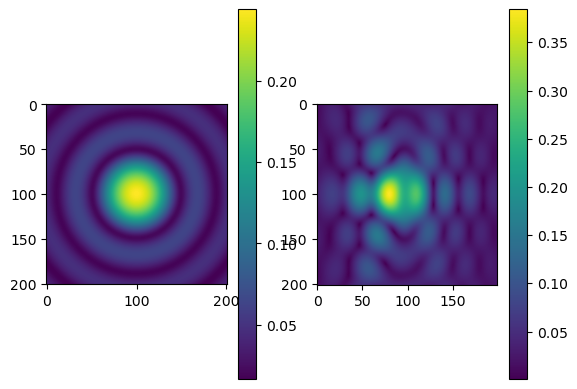

In [6]:
propagator1 = ScalarCartesianPropagator(pupil1, n_pix_psf=n_pix_psf, wavelength=wavelength, na=na, fov=fov,
                                        defocus_min=-defocus, defocus_max=defocus, n_defocus=n_defocus,
                                        apod_factor=False, gibson_lanni=True)
field1 = propagator1.compute_focus_field()
print(torch.max(torch.abs(field1)))

idx = n_defocus // 2
ax_idx = 0
print(field1.shape)
plt.figure()
plt.subplot(121)
plt.imshow(torch.abs(field1[idx,ax_idx,...].squeeze()))
plt.colorbar()
plt.subplot(122)
plt.imshow(torch.abs(field1[:, ax_idx, n_pix_psf//2, :].squeeze().T))
plt.colorbar()
plt.show()

tensor(0.3847)
torch.Size([200, 1, 201, 201])


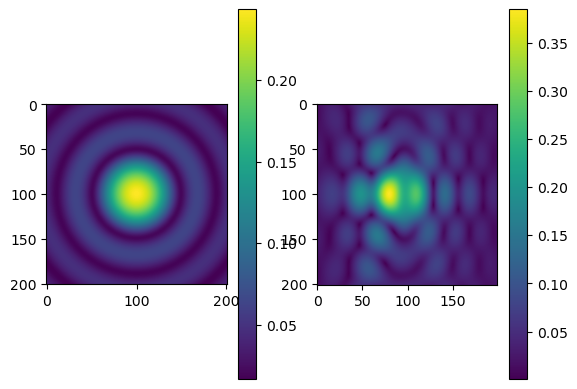

In [7]:
propagator2 = ScalarPolarPropagator(pupil2, n_pix_psf=n_pix_psf, wavelength=wavelength, na=na, fov=fov, 
                                    defocus_min=-defocus, defocus_max=defocus, n_defocus=n_defocus,
                                    apod_factor=False, gibson_lanni=True)
field2 = propagator2.compute_focus_field()
print(torch.max(torch.abs(field2)))

idx = n_defocus // 2
ax_idx = 0
print(field2.shape)
plt.figure()
plt.subplot(121)
plt.imshow(torch.abs(field2[idx,ax_idx,...].squeeze()))
plt.colorbar()
plt.subplot(122)
plt.imshow(torch.abs(field2[:, ax_idx, n_pix_psf//2, :].squeeze().T))
plt.colorbar()
plt.show()

tensor(0.3265)
torch.Size([200, 3, 201, 201])


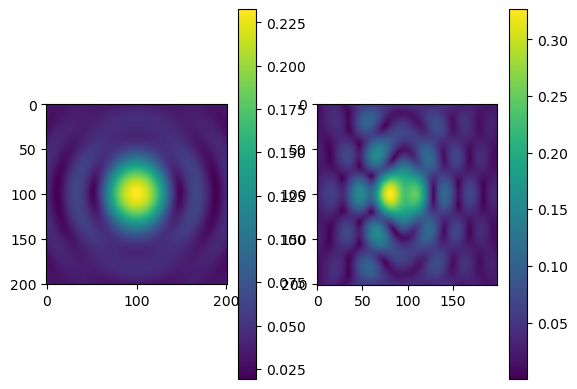

In [10]:
propagator3 = VectorialCartesianPropagator(pupil3, n_pix_psf=n_pix_psf, wavelength=wavelength, na=na, fov=fov, 
                                       defocus_min=-defocus, defocus_max=defocus, n_defocus=n_defocus,
                                       apod_factor=False, gibson_lanni=True)
field3 = propagator3.compute_focus_field()
print(torch.max(torch.abs(field3)))

intensity = torch.sqrt(torch.sum(torch.abs(field3[:, :, :, :].squeeze())**2, dim=1))
idx = n_defocus // 2
print(field3.shape)
plt.figure()
plt.subplot(121)
plt.imshow(intensity[idx,...].squeeze())
plt.colorbar()
plt.subplot(122)
plt.imshow(intensity[:, n_pix_psf//2, :].squeeze().T)
plt.colorbar()
plt.show()

tensor(0.3268)
torch.Size([200, 3, 201, 201])


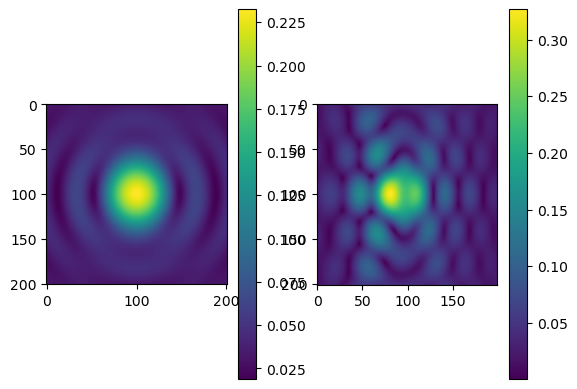

In [9]:
propagator4 = VectorialPolarPropagator(pupil4, n_pix_psf=n_pix_psf, wavelength=wavelength, na=na, fov=fov, 
                                       defocus_min=-defocus, defocus_max=defocus, n_defocus=n_defocus,
                                       apod_factor=False, gibson_lanni=True)
field4 = propagator4.compute_focus_field()
print(torch.max(torch.abs(field4)))

intensity = torch.sqrt(torch.sum(torch.abs(field4[:, :, :, :].squeeze())**2, dim=1))
idx = n_defocus // 2
print(field4.shape)
plt.figure()
plt.subplot(121)
plt.imshow(intensity[idx,...].squeeze())
plt.colorbar()
plt.subplot(122)
plt.imshow(intensity[:, n_pix_psf//2, :].squeeze().T)
plt.colorbar()
plt.show()

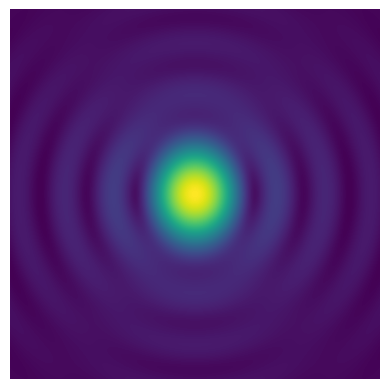

In [ ]:
plt.figure()
plt.imshow(intensity[idx,...].squeeze())
plt.axis('off')
plt.savefig('xy_img.svg')
plt.show()

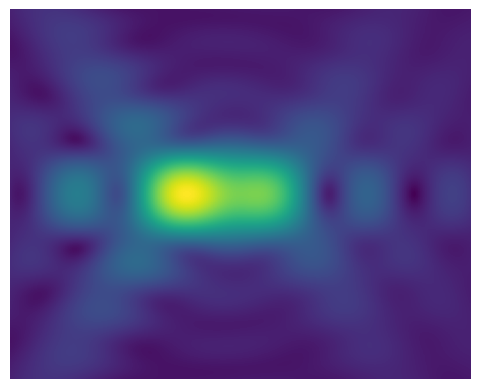

In [ ]:
plt.figure()
plt.imshow(intensity[:, :, n_pix_psf//2].squeeze().T, aspect=0.4)
plt.axis('off')
plt.savefig('xz_img.svg')
plt.show()

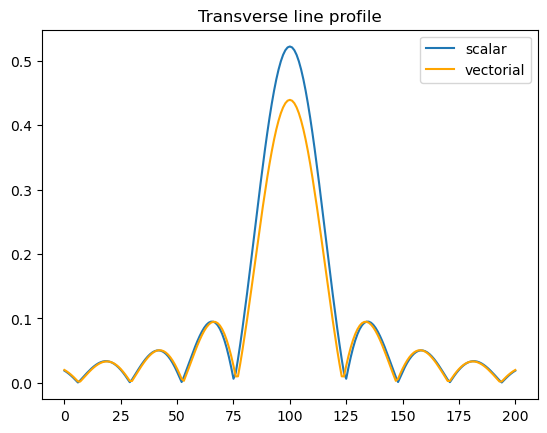

In [29]:
line_scalar = torch.abs(field1[idx, 0, n_pix_psf//2, :])
line_vectorial = intensity[idx, n_pix_psf//2, :]
# line_scalar = line_scalar / torch.max(line_scalar)
# line_vectorial = line_vectorial / torch.max(line_vectorial)
plt.plot(line_scalar, label='scalar')
plt.plot(line_vectorial, label='vectorial', color='orange')
plt.title('Transverse line profile')
plt.legend()
plt.show()

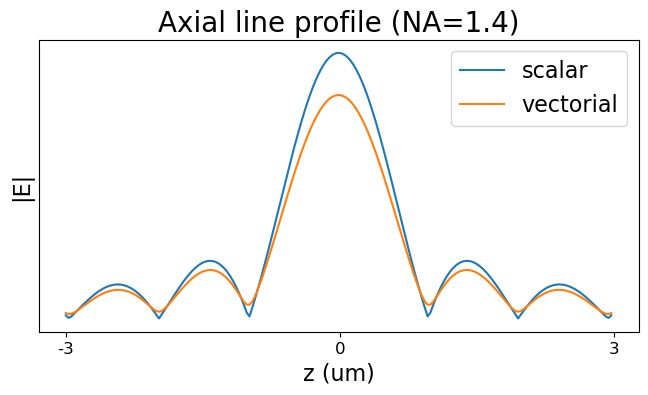

In [36]:
line_scalar = torch.abs(field1[:, 0, n_pix_psf//2, n_pix_psf//2])
line_vectorial = intensity[:, n_pix_psf//2, n_pix_psf//2]
# line_scalar = line_scalar / torch.max(line_scalar)
# line_vectorial = line_vectorial / torch.max(line_vectorial)
plt.figure(figsize=(8,4))
plt.plot(line_scalar, label='scalar')
plt.plot(line_vectorial, label='vectorial')
plt.xticks([0, 100, 200], labels=[-30,0,30], size=12)
plt.xlabel('z (um)', size=16)
plt.yticks([])
plt.ylabel('|E|', size=16)
plt.legend(fontsize=16)
plt.title('Axial line profile (NA=0.5)', size=20)
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)
plt.savefig('axial_vectorial_vs_scalar.svg')
plt.show()